In [0]:
import pandas as pd
url='https://raw.githubusercontent.com/ACM-NITK/Machine-Learning-SMP-2019/master/Assignment%201/PL18-19.csv'
df= pd.read_csv(url)


In [2]:
df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,2018-08-10,Man United,Leicester,2,1,H,1,0,H,A Marriner,8,13,6,4,11,8,2,5,2,1,0,0
1,2018-08-11,Bournemouth,Cardiff,2,0,H,1,0,H,K Friend,12,10,4,1,11,9,7,4,1,1,0,0
2,2018-08-11,Fulham,Crystal Palace,0,2,A,0,1,A,M Dean,15,10,6,9,9,11,5,5,1,2,0,0
3,2018-08-11,Huddersfield,Chelsea,0,3,A,0,2,A,C Kavanagh,6,13,1,4,9,8,2,5,2,1,0,0
4,2018-08-11,Newcastle,Tottenham,1,2,A,1,2,A,M Atkinson,15,15,2,5,11,12,3,5,2,2,0,0


In [3]:
df.columns

Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG',
       'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC',
       'HY', 'AY', 'HR', 'AR'],
      dtype='object')

In [0]:
df=df.rename(columns = {'FTHG':'Home','FTAG':'Away','FTR':'Result','HTHG':'HalfTime_Home','HTAG':'HalfTime_Away','HTR':'HalfTime_Result','HS':'Home_Shots','AS':'Away_Shots','HST':'Home_OnTarget','AST':'Away_OnTarget','HF':'Home_Fouls','AF':'Away_Fouls','HC':'Home_Corners','AC':'Away_Coners','HY':'Home_Yellows','AY':'Away_Yellow','HR':'Home_Reds','AR':'Away_Reds'})

New Feature Names


In [5]:
df


,Date,HomeTeam,AwayTeam,Home,Away,Result,HalfTime_Home,HalfTime_Away,HalfTime_Result,Referee,Home_Shots,Away_Shots,Home_OnTarget,Away_OnTarget,Home_Fouls,Away_Fouls,Home_Corners,Away_Coners,Home_Yellows,Away_Yellow,Home_Reds,Away_Reds
0,2018-08-10,Man United,Leicester,2,1,H,1,0,H,A Marriner,8,13,6,4,11,8,2,5,2,1,0,0
1,2018-08-11,Bournemouth,Cardiff,2,0,H,1,0,H,K Friend,12,10,4,1,11,9,7,4,1,1,0,0
2,2018-08-11,Fulham,Crystal Palace,0,2,A,0,1,A,M Dean,15,10,6,9,9,11,5,5,1,2,0,0
3,2018-08-11,Huddersfield,Chelsea,0,3,A,0,2,A,C Kavanagh,6,13,1,4,9,8,2,5,2,1,0,0
4,2018-08-11,Newcastle,Tottenham,1,2,A,1,2,A,M Atkinson,15,15,2,5,11,12,3,5,2,2,0,0
5,2018-08-11,Watford,Brighton,2,0,H,1,0,H,J Moss,19,6,5,0,10,16,8,2,2,2,0,0
6,2018-08-11,Wolves,Everton,2,2,D,1,1,D,C Pawson,11,6,4,5,8,7,3,6,0,1,0,1
7,2018-08-12,Arsenal,Man City,0,2,A,0,1,A,M Oliver,9,17,3,8,11,14,2,9,2,2,0,0
8,2018-08-12,Liverpool,West Ham,4,0,H,2,0,H,A Taylor,18,5,8,2,14,9,5,4,1,2,0,0
9,2018-08-12,Southampton,Burnley,0,0,D,0,0,D,G Scott,18,16,3,6,10,9,8,5,0,1,0,0


All Competing Teams Alphabetically

In [6]:
pd.Series(pd.unique(df.sort_values(by=['HomeTeam','AwayTeam'],ascending=[True,True])[['HomeTeam','AwayTeam']].values.ravel('K')))

0            Arsenal
1        Bournemouth
2           Brighton
3            Burnley
4            Cardiff
5            Chelsea
6     Crystal Palace
7            Everton
8             Fulham
9       Huddersfield
10         Leicester
11         Liverpool
12          Man City
13        Man United
14         Newcastle
15       Southampton
16         Tottenham
17           Watford
18          West Ham
19            Wolves
dtype: object

Maximum Number Of Shots Taken During a Match

In [7]:
Shots = df['Home_Shots']+df['Away_Shots']
Shots.max()

42

Average of 'shots on target to total shots'

In [8]:
OnTarget = df['Home_OnTarget']+df['Away_OnTarget']
Ratio= OnTarget/Shots
Ratio.mean()

0.3440823413982824

Toltal Cards given out  by each refree in the competition 

In [9]:
df.groupby("Referee")['Away_Yellow','Home_Yellows','Away_Reds','Home_Reds'].sum().sum(axis=1)

Referee
A Madley         2
A Marriner      76
A Taylor       103
C Kavanagh      76
C Pawson        99
D Coote         35
G Scott         39
J Linington      4
J Moss          98
K Friend        92
L Mason         64
L Probert       50
M Atkinson      92
M Dean         137
M Oliver        90
P Tierney       83
R East          44
S Attwell       64
S Hooper        20
dtype: int64

Team with most cards

In [10]:
Cards=df.groupby('HomeTeam')['Home_Yellows','Home_Reds'].sum().sum(axis=1) + df.groupby('AwayTeam')['Away_Yellow','Away_Reds'].sum().sum(axis=1)
Cards.loc[(Cards==Cards.max())]

HomeTeam
Watford    81
dtype: int64

Refree with home team winning most matches

In [11]:
RefResult = df[df['Result']=='H'].groupby("Referee")['Result'].value_counts()
RefResult.loc[(RefResult==RefResult.max())]

Referee   Result
A Taylor  H         20
Name: Result, dtype: int64

 percentage of matches in which the teams winning at half time went on to win the match at full time

In [12]:
(df[df['Result']==df['HalfTime_Result']].size/df.size)*100.0

60.0

**PL Table**

In [13]:
col_names = ['Position','Club','Played','Won','Drawn','Lost','GF','GA','GD','Points']
dfNew=pd.DataFrame(columns=col_names)
dfNew['Club']=pd.Series(pd.unique(df.sort_values(by=['HomeTeam','AwayTeam'],ascending=[True,True])[['HomeTeam','AwayTeam']].values.ravel('K')))
dfNew['Played']=(df['HomeTeam'].value_counts()+df['AwayTeam'].value_counts()).values
dfNew['Won']=df[df['Result']=='H']['HomeTeam'].value_counts().sort_index().add(df[df['Result']=='A']['AwayTeam'].value_counts().sort_index(),fill_value=0).values
dfNew['Drawn']=df[df['Result']=='D']['HomeTeam'].value_counts().sort_index().add(df[df['Result']=='D']['AwayTeam'].value_counts().sort_index(),fill_value=0).values
dfNew['Lost']=df[df['Result']=='A']['HomeTeam'].value_counts().sort_index().add(df[df['Result']=='H']['AwayTeam'].value_counts().sort_index(),fill_value=0).values
dfNew['GF']=(df.groupby("HomeTeam")['Home'].sum()+df.groupby("AwayTeam")['Away'].sum()).values
dfNew['GA']=(df.groupby("HomeTeam")['Away'].sum()+df.groupby("AwayTeam")['Home'].sum()).values
dfNew['GD']=dfNew['GF']-dfNew['GA']
dfNew=dfNew.fillna(0)
dfNew['Points']=(dfNew['Won']*3+dfNew['Drawn'])
dfNew=dfNew.sort_values(by=['Points','GD'],ascending=[False,False])
dfNew=dfNew.reset_index(drop=True)
dfNew['Position']=dfNew.index+1
dfNew

,Position,Club,Played,Won,Drawn,Lost,GF,GA,GD,Points
0,1,Man City,38,32,2.0,4.0,95,23,72,98.0
1,2,Liverpool,38,30,7.0,1.0,89,22,67,97.0
2,3,Chelsea,38,21,9.0,8.0,63,39,24,72.0
3,4,Tottenham,38,23,2.0,13.0,67,39,28,71.0
4,5,Arsenal,38,21,7.0,10.0,73,51,22,70.0
5,6,Man United,38,19,9.0,10.0,65,54,11,66.0
6,7,Wolves,38,16,9.0,13.0,47,46,1,57.0
7,8,Everton,38,15,9.0,14.0,54,46,8,54.0
8,9,Leicester,38,15,7.0,16.0,51,48,3,52.0
9,10,West Ham,38,15,7.0,16.0,52,55,-3,52.0


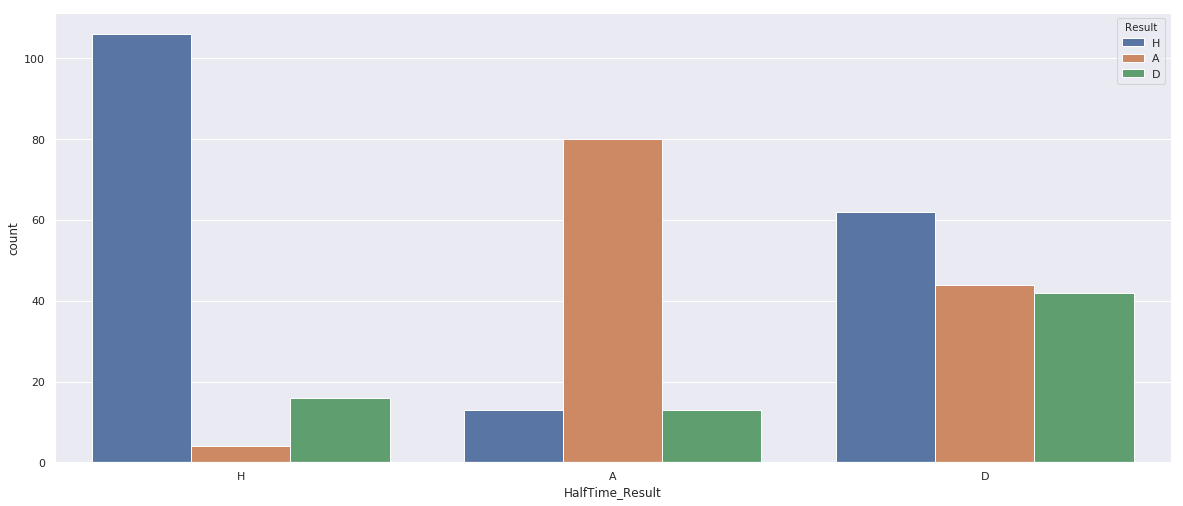

In [15]:
import seaborn as sns
sns.set(rc={'figure.figsize':(20,8.27)})
sns.countplot(x='HalfTime_Result',hue='Result',data=df)


Well ,here we can see that the half time result can be used quite well to predict the full time result (More or less);